In [1]:
import scanpy as sc
import anndata as ad

def plot_umap(counts_df, metadat, colorby, axis, normalize, palette='tab20'):
    adata = ad.AnnData(counts_df.T.values)
    adata.obs["batch"] = metadat["batch"].to_numpy(dtype="<U6")
    adata.obs["group"] = metadat["group"].to_numpy(dtype="<U6")

    if normalize:
        sc.pp.normalize_total(adata)
        sc.pp.log1p(adata)
        sc.pp.scale(adata)
        
    sc.tl.pca(adata, svd_solver='arpack')
    sc.pp.neighbors(adata, n_pcs=40)

    sc.tl.umap(adata)

    sc.pl.umap(adata, color=colorby, palette=palette, ax=axis, show=False, legend_loc=None)


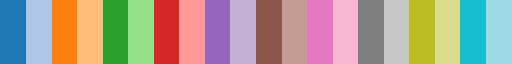

In [4]:
import matplotlib.pyplot as plt

color_map = [plt.get_cmap('tab20')(i) for i in range(20)] 
plt.get_cmap("tab20")

In [ ]:
import os

# Configuration
exp_folder = "/DATA"
experiments = sorted([f for f in os.listdir(exp_folder) if f.startswith("experiment")])
csvs = ["batch", "recombat", "recombatseq"]
csv_map = {"batch": "Raw", "recombat": "reComBat", "recombatseq": "reComBat-seq"}

/usr/local/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


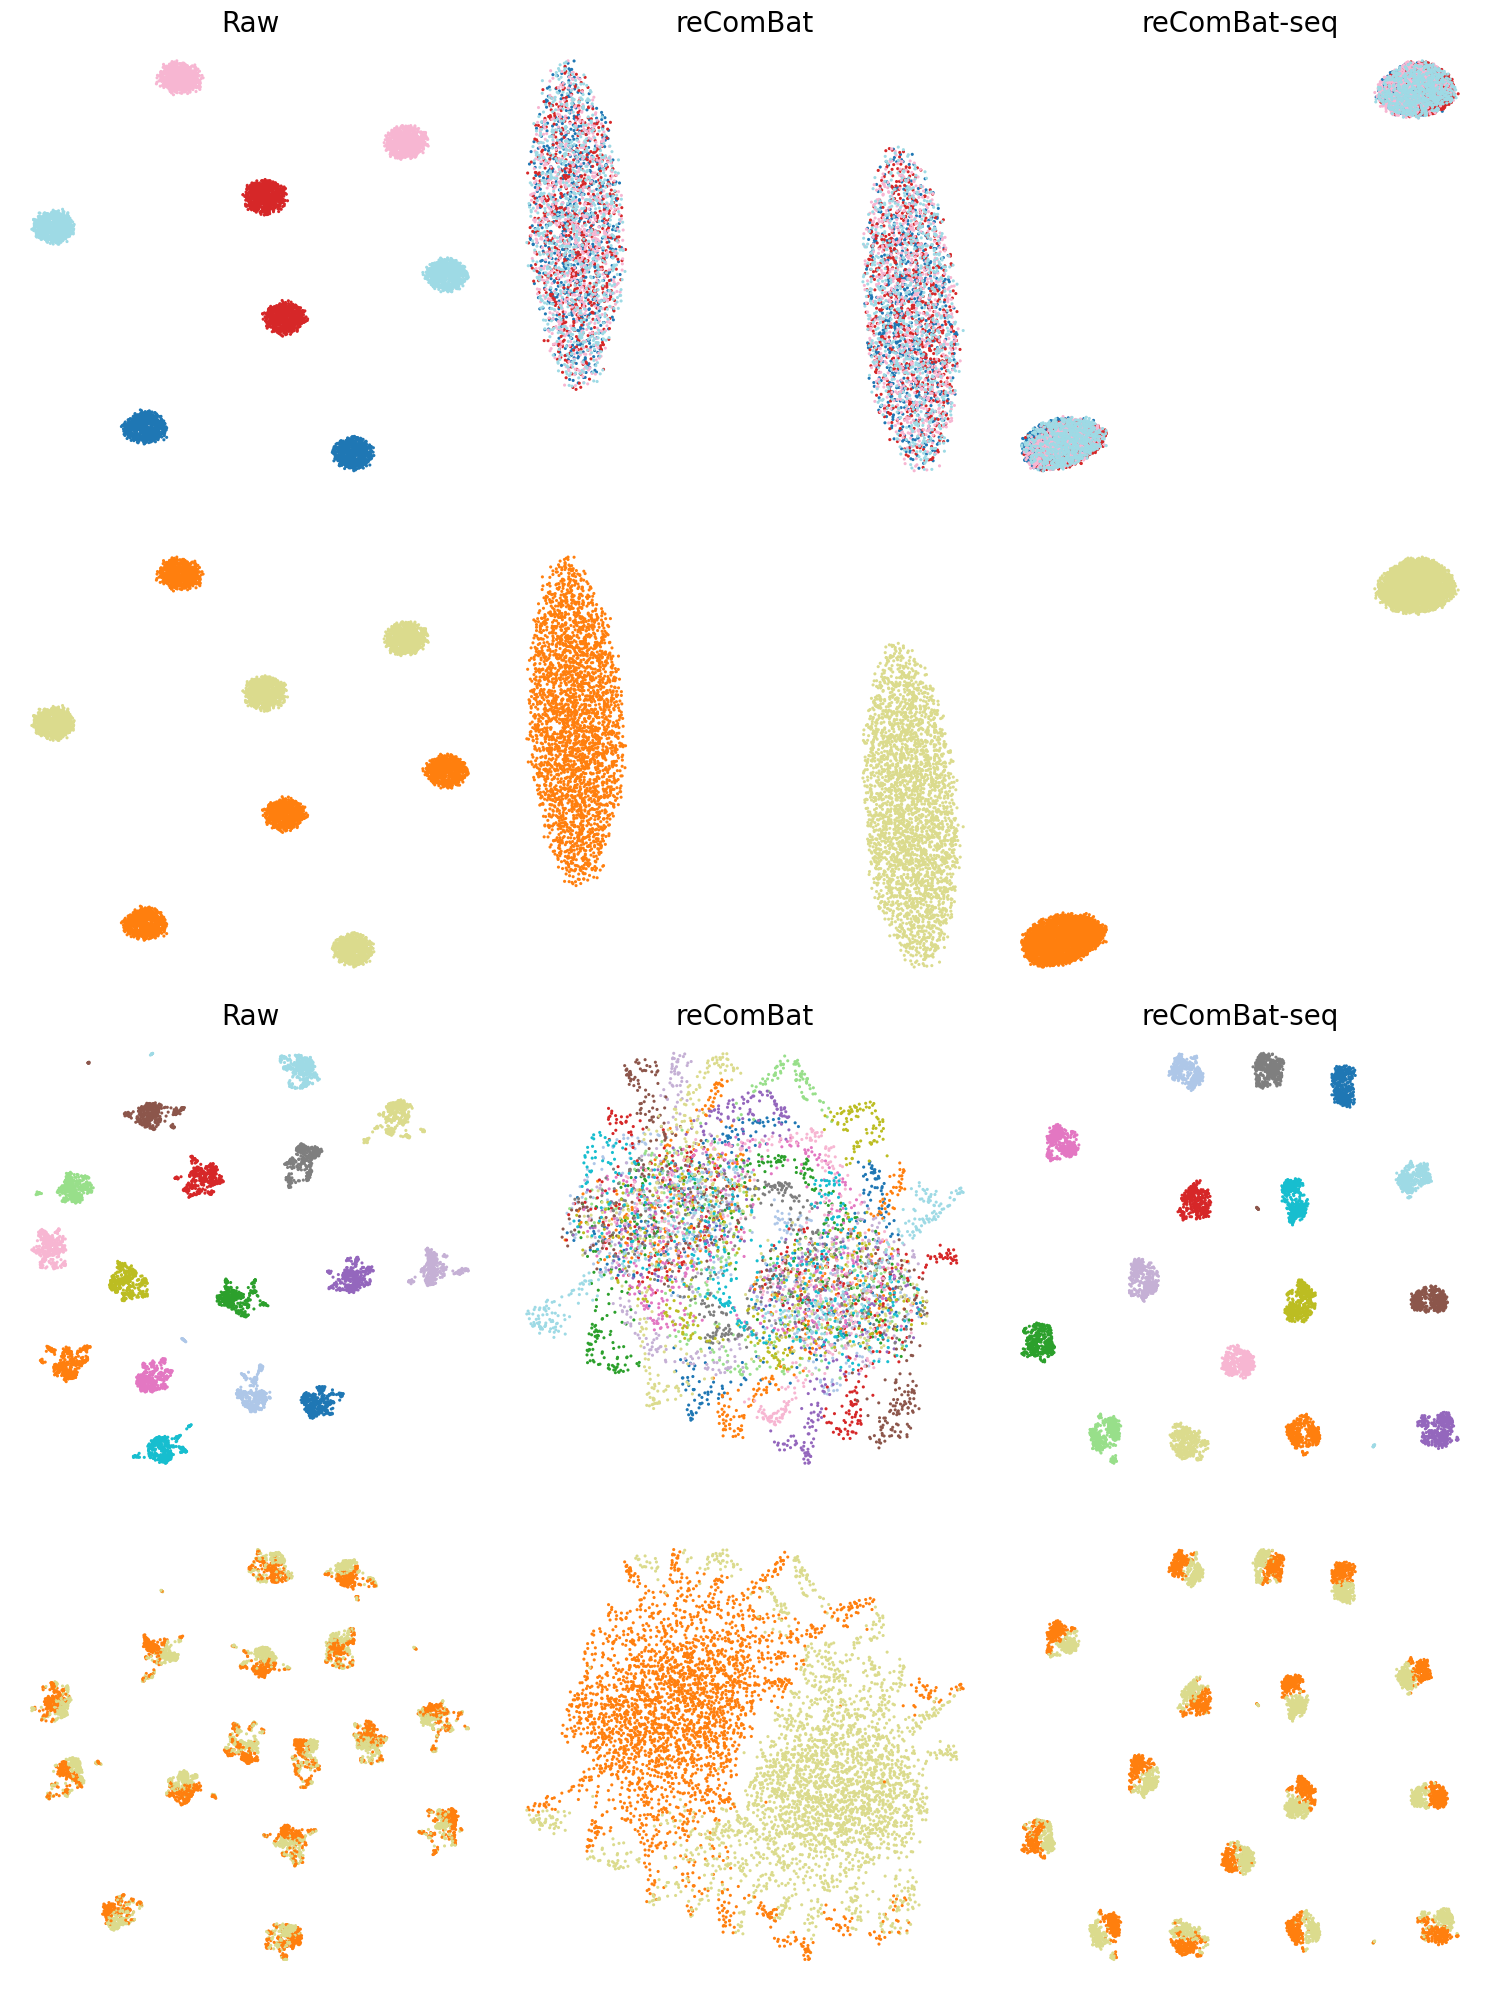

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

exp = ["4_iter5", "16_iter4"]
fig, axes = plt.subplots(4, 3)

for iter_idx, exp_idx in enumerate(exp):
    for col_idx, csv in enumerate(csvs):
        normalize = True

        csv_path = os.path.join(exp_folder, f"{exp_idx}_{csv}_df.csv")
        csv_df = pd.read_csv(csv_path, index_col=0)
        metadata = pd.read_csv(os.path.join(exp_folder, f"{exp_idx}_metadata.csv"), index_col=0)

        if csv == "recombat":
            normalize = False

        plot_umap(csv_df, metadata, colorby="batch", axis=axes[iter_idx*2,col_idx], normalize=normalize)
        plot_umap(csv_df, metadata, colorby="group", axis=axes[iter_idx*2+1,col_idx], normalize=normalize, 
                    palette=[color_map[2],color_map[20-3]])

        axes[iter_idx*2,col_idx].set_title(csv_map[csv], fontsize=20)
        axes[iter_idx*2+1,col_idx].set_title("  ", fontsize=20)
        
        axes[iter_idx*2,col_idx].axis("off")
        axes[iter_idx*2+1,col_idx].axis("off")

fig.set_figwidth(15)
fig.set_figheight(20)
fig.tight_layout()
#fig.savefig("DATA/batch_comparison.png", dpi=300)